In [109]:
# VGG -16 , VGG-19
# tensorflow version 2.4.1 # unsatble 
# tensorflow > 2.0
#tensorflow < 1.14  
# 
from tensorflow.keras.applications.vgg16 import VGG16 # VGG16 Pre-Trained Model

model = VGG16()

In [110]:
# 3 - channel - RGB color space --- HSV color space YcrCb color space 
# 1 - Gray Scale -- R + G + B / 3  -----> single channel
# image processing ---
# input shape --- 224 x 224 x3
model.summary()


Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [111]:
#print(len(model.layers))
# Model layers = (total_number_layer - (pooling+ flatten + predection))
len(model.layers) -7

16

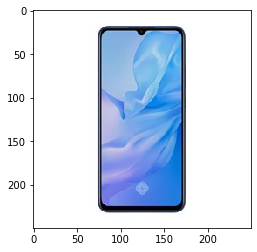

In [123]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import imread, imshow

# opencv --> format BGR
# img  = cv2.imread('img.jpg')
# resize_img = cv2.resize(img, x = 1/3, y = 1/3)
# keras --> format RGB
# PIL Images ---> format RGB
image = load_img('C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images\\mobile\\img6.jpg', target_size = (224, 224))
image = np.array(image)
# N, H, W, C
#print(image.shape)mobile
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

image = tf.keras.applications.imagenet_utils.preprocess_input(image)
img = imread('C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images\\mobile\\img6.jpg')
imshow(img)


In [124]:
#number of classes 1000 in VGG16 pre-Trained model
Y_pred = model.predict(image)
label = tf.keras.applications.imagenet_utils.decode_predictions(Y_pred)
label
# retrieve the most likely result, e.g. highest probability
label = label[0]
print(label)

[('n03584254', 'iPod', 0.22051086), ('n02992529', 'cellular_telephone', 0.15990557), ('n03180011', 'desktop_computer', 0.062800534), ('n03666591', 'lighter', 0.06221031), ('n04404412', 'television', 0.04594697)]


In [137]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from keras.utils import layer_utils
from tensorflow.keras.applications.imagenet_utils import decode_predictions, preprocess_input
import tensorflow as tf

In [138]:
def VGG16Net(inputs = None, classes = 2):
    img_height, img_width = 224,  224
    img_channel = 3
    img_ndim = (img_height, img_width, img_channel)
    img_input = tf.keras.Input(shape = img_ndim)
    
    # padding 'same'---> input_image_size = output_image_size
    # Block -1
    x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'block1_conv1')(img_input)
    x = Conv2D(64, (3, 3), activation = 'relu', padding = 'same', name = 'block1_conv2')(x)
    x = MaxPooling2D((2, 2), strides = (2, 2), name= 'block1_pool')(x)
    
    # Block -2
    x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same', name = 'block2_conv1')(x)
    x = Conv2D(128, (3, 3), activation = 'relu', padding = 'same', name = 'block2_conv2')(x)
    x = MaxPooling2D((2, 2), strides = (2, 2), name= 'block2_pool')(x)
    
    # Block -3
    x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv1')(x)
    x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv2')(x)
    x = Conv2D(256, (3, 3), activation = 'relu', padding = 'same', name = 'block3_conv3')(x)
    x = MaxPooling2D((2, 2), strides = (2, 2), name= 'block3_pool')(x)
    
    # Block -4
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv1')(x)
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv2')(x)
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block4_conv3')(x)
    x = MaxPooling2D((2, 2), strides = (2, 2), name= 'block4_pool')(x)
    
      # Block -5
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv1')(x)
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv2')(x)
    x = Conv2D(512, (3, 3), activation = 'relu', padding = 'same', name = 'block5_conv3')(x)
    x = MaxPooling2D((2, 2), strides = (2, 2), name= 'block5_pool')(x)
    
    
    # Classification Block
    x = Flatten(name = 'flatten')(x)
    x = Dense(4096, activation = 'relu', name ='fc1')(x)
    x = Dense(4096, activation = 'relu', name ='fc2')(x)
    x = Dense(classes, activation = 'softmax', name = 'prediction_layer')(x)
    
    
    # create model
    model = Model(inputs = img_input, outputs = x, name = 'VGG16Net')
    
    return model
    
    
    

In [139]:
model = VGG16Net(classes = 2)


In [140]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']) # if target variable is a matrix then loss function will be "sparse_categorical_crossentropy"

In [141]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Image folder structure 
# - images
#    + laptop  ---> 500 images for laptop
#    + mobile  ---> 500 images for mobile
PATH = 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images'
dataset = os.listdir(PATH) # ['laptop', 'mobile']
product = []
#print(dataset)

for i in dataset:
    items = os.listdir(PATH +'/'+i)
    for j in items:
        product.append((i, str(PATH +'/'+i) + '/'+ j)) # list -- [product, image_path]
        print(product)

[('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img1.jpg')]
[('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img1.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img10.jpg')]
[('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img1.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img10.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img2.jpg')]
[('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img1.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img10.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img2.jpg'), ('laptop', 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images/laptop/img3.jpg')]
[('laptop', 'C:\\Users\\Prashant 

In [142]:
product_df = pd.DataFrame(data = product, columns = ['products', 'image'])
product_df

,products,image
0,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
1,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
2,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
3,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
4,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
5,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
6,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
7,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
8,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...
9,laptop,C:\Users\Prashant Verma\Desktop\AI_Classes\Dat...


In [143]:
import cv2

im_size = 224
images, labels = [], []
path = PATH + '/'
for i in dataset:
    data_path = path + str(i) # 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images\\laptop\\'
    filename = [i for i in os.listdir(data_path)]  
    print(i+':',filename)
    for file in filename:
        img = cv2.imread(data_path + '/' +file)
        img = cv2.resize(img, (im_size, im_size))
        images.append(img)
        labels.append(i)

        
        

laptop: ['img1.jpg', 'img10.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg', 'img7.jpg', 'img8.jpg', 'img9.jpg']
mobile: ['img1.jpg', 'img10.jpg', 'img2.jpg', 'img3.jpg', 'img4.jpg', 'img5.jpg', 'img6.jpg', 'img7.jpg', 'img8.jpg', 'img9.jpg']


In [144]:
images = np.array(images)
images = images.astype('float32') / 255
images.shape

(20, 224, 224, 3)

In [145]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
y = product_df['products'].values
y_labelencoder = LabelEncoder()
y = y_labelencoder.fit_transform(y)
print(y)



[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


In [146]:
y = y.reshape(-1, 1)

onehot = OneHotEncoder(categorical_features = [0])
y = onehot.fit_transform(y)
y.shape


c:\users\prashant verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\users\prashant verma\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


(20, 2)

In [147]:
#from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#images = shuffle(images, Y, random_state = 1)
train_X , test_X, train_y, test_y = train_test_split(images, y, test_size = 0.2, random_state = False)

print(train_X.shape)
print(train_y.shape)
print(test_X.shape)
print(test_y.shape)

(16, 224, 224, 3)
(16, 2)
(4, 224, 224, 3)
(4, 2)


In [82]:
# ohe = OneHotEncoder()
# train_y = ohe.fit_transform(train_y.reshape(-1,1))
# test_y = ohe.transform(test_y.reshape(-1,1))

# print(train_X.shape)
# print(train_y.shape)
# print(test_X.shape)
# print(test_y.shape)

In [149]:
print(type(train_y.todense())) # return matrix type--
train_y = train_y.todense() # return array 
train_y

<class 'numpy.matrix'>


matrix([[0., 1.],
        [0., 1.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.],
        [1., 0.],
        [1., 0.],
        [0., 1.],
        [0., 1.]])

In [150]:
model.fit(train_X, train_y, epochs =10, batch_size = 5, verbose = True)

Train on 16 samples
Epoch 1/10
16/16 [==============================] - 108s 7s/sample - loss: 3.0145 - accuracy: 0.4375
Epoch 2/10
16/16 [==============================] - 35s 2s/sample - loss: 0.7072 - accuracy: 0.5000
Epoch 3/10
16/16 [==============================] - 24s 1s/sample - loss: 0.7128 - accuracy: 0.5000
Epoch 4/10
16/16 [==============================] - 19s 1s/sample - loss: 0.7219 - accuracy: 0.5000
Epoch 5/10
16/16 [==============================] - 17s 1s/sample - loss: 1.1823 - accuracy: 0.5000
Epoch 6/10
16/16 [==============================] - 16s 1s/sample - loss: 0.6932 - accuracy: 0.5000
Epoch 7/10
16/16 [==============================] - 16s 997ms/sample - loss: 0.6893 - accuracy: 0.5000
Epoch 8/10
16/16 [==============================] - 17s 1s/sample - loss: 0.7225 - accuracy: 0.5000
Epoch 9/10
16/16 [==============================] - 16s 1s/sample - loss: 0.6986 - accuracy: 0.5000
Epoch 10/10
16/16 [==============================] - 17s 1s/sample - loss: 0

(1, 224, 224, 3)


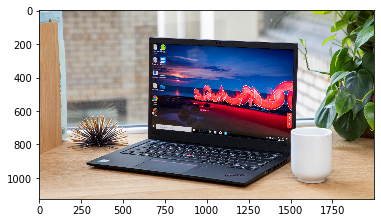

In [151]:
from matplotlib.pyplot import imread, imshow
from tensorflow.keras.preprocessing.image import load_img, img_to_array

img_path = 'C:\\Users\\Prashant Verma\\Desktop\\AI_Classes\\Datasets\\images\\laptop\\img2.jpg'
img = load_img(img_path, target_size =(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis = 0)
x = tf.keras.applications.imagenet_utils.preprocess_input(x)

print(x.shape)

image = imread(img_path)
imshow(image)


In [152]:
Y_pred = model.predict(x)
Y_pred

array([[0.4749266 , 0.52507347]], dtype=float32)